实验过程：

1.读取以pandas库中的函数（read_table）读取wine数据集（data），第一列为wine的类别，剩下的是数据集的特征，给出数据的基本介绍（data.info（））和描述性统计（data.describe（）），以及各个类别的占比。

In [47]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
# 命名数据集的列名
column_names = ['class'] + ['V' + str(i) for i in range(1, 14)]
# 读取wine数据集（data）
data = pd.read_table("C:\\Users\\DELL\\Desktop\\wine.data", sep=',', names=column_names)
# 给出数据的基本介绍（data.info（））
data.info()
# 描述性统计（data.describe（）)
data.describe()
# 计算各个类别的占比
class_ratios = data['class'].value_counts(normalize=True,sort=None)
# 输出类别及其占比
for wine_class, ratio in class_ratios.iteritems():
    print(f'类别：{wine_class}，比例：{ratio:.2%}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   178 non-null    int64  
 1   V1      178 non-null    float64
 2   V2      178 non-null    float64
 3   V3      178 non-null    float64
 4   V4      178 non-null    float64
 5   V5      178 non-null    int64  
 6   V6      178 non-null    float64
 7   V7      178 non-null    float64
 8   V8      178 non-null    float64
 9   V9      178 non-null    float64
 10  V10     178 non-null    float64
 11  V11     178 non-null    float64
 12  V12     178 non-null    float64
 13  V13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
类别：1，比例：33.15%
类别：2，比例：39.89%
类别：3，比例：26.97%


In [48]:
data

,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2.划分训练集（75%）和测试集（25%），尽可能保证训练集和测试集中不同类别的占比与原数据集一致(设置参数"stratify")。

In [49]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

3.针对wine数据集，应用sklearn的朴素贝叶斯算法（高斯模型）进行对测试集进行类别预测，给出预测的准确率：

In [50]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# 计算准确率
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'准确率: {accuracy:.2%}')

准确率: 97.78%


准确率（模型预测正确的样本占总样本数的比例）为 97.78%，表明模型预测正确的概率非常高

4.计算测试集的真实标签和预测标签构造混淆矩阵，给出解释，同时计算精确率，召回率和F1值。

In [51]:
# 构建混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print('混淆矩阵:\n', cm)
from sklearn.metrics import precision_score, recall_score, f1_score
# 计算精确率
precision = precision_score(y_test, y_pred, average='weighted')
print(f'精确率: {precision:.2%}')
# 计算召回率
recall = recall_score(y_test, y_pred, average='weighted')
print(f'召回率: {recall:.2%}')
# 计算 F1 值
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 值: {f1:.2%}')

混淆矩阵:
 [[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
精确率: 97.92%
召回率: 97.78%
F1 值: 97.78%


根据以上混淆矩阵，可知，对于实际归属于类别1的测试样本，朴素贝叶斯模型将它们全部正确地预测为类别1，而没有误判为其他类别；
对于实际归属于类别2的测试样本，朴素贝叶斯模型将其中一个样本错误预测为类别 1，将剩余的17个样本正确地预测为类别2，没有将样本错误预测为类别3；
对于实际归属于类别3的测试样本，朴素贝叶斯模型将它们全部正确地预测为类别3，而没有误判为其他类别.
另外，模型精确率为 97.92%，表明模型在预测各个类别时，预测为正类的样本中真实为正类的概率很高；
召回率为 97.78%，表明模型能够找到并预测正确的正类样本的概率很高；
F1 值（精确率和召回率的调和平均值，用于评估模型的整体性能）为 97.78%，表明模型在各个类别的预测表现很好。

5.查阅资料绘制ROC曲线

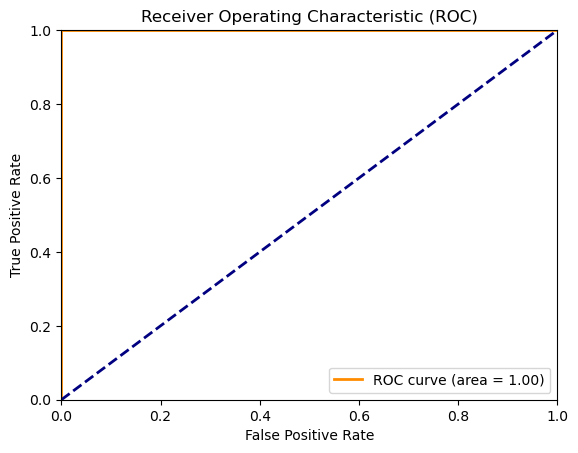

In [63]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_pred_prob = gnb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test_bin[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

ROC曲线是一种用来评估二分类模型的性能的图形工具，它显示了在不同阈值下，真正例率（TPR）和假正例率（FPR）之间的关系。roc曲线下的面积（AUC）是一个衡量模型分类能力的指标，越接近1越好。
分析本实验的ROC曲线输出图，发现曲线下面积为1，表示朴素贝叶斯在 wine 数据集上的表现非常出色，模型在预测各个类别时都具有很高的准确性。


朴素贝叶斯算法的优点有：
1.假设简单，易于理解，训练速度快。
2.如果特征之间的独立性假设成立，它可以比其他模型表现得更好，而且需要的训练数据更少。
3.尽管基于不现实的独立性假设，但在许多实际问题中，它的性能仍然非常出色。
4.适合处理多分类问题，可以处理离散或连续特征。
5.与其他分类算法相比，只需要较少的训练数据就能达到合理的分类性能。

朴素贝叶斯算法的缺点有：
1.特征之间是条件独立的这一核心假设在实际中往往不成立，导致模型的准确率降低。
2.不能学习特征之间的关系和相互作用，也不能捕捉特征的重要性，虽然可以处理大量特征，但是不相关或冗余特征可能会影响模型的性能。
3.当训练数据不平衡（某些类别的样本很少）时，表现不太好，对零概率问题（即某个类别下某个特征值没有出现过）比较敏感，需要使用平滑技术来避免。
4.依赖于输入数据的分布，例如本实验中，假设数据服从高斯分布，但实际可能不是，这将影响模型性能。